In [1]:
!git clone https://github.com/hiyouga/LLaMA-Factory.git
%cd LLaMA-Factory
!pip install -r requirements.txt
!pip install bitsandbytes
!pip install datasets==2.20.0 --no-deps
!pip install -e ".[torch, metrics]"
!pip install liger-kernel
!pip uninstall transformers -y
!pip install transformers==4.46.1

Cloning into 'LLaMA-Factory'...
remote: Enumerating objects: 23449, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 23449 (delta 47), reused 20 (delta 20), pack-reused 23369 (from 2)
Receiving objects: 100% (23449/23449), 47.99 MiB | 35.69 MiB/s, done.
Resolving deltas: 100% (16945/16945), done.
/kaggle/working/LLaMA-Factory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 38.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta

In [2]:
!pip install accelerate==0.34.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.5.2
    Uninstalling accelerate-1.5.2:
      Successfully uninstalled accelerate-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llamafactory 0.9.3.dev0 requires transformers!=4.46.*,!=4.47.*,!=4.48.0,<=4.51.3,>=4.45.0, but you have transformers 4.46.1 which is incompatible.


In [3]:
!cp -r /kaggle/input/tvl-dataset/dataset_info.json /kaggle/working/LLaMA-Factory/data

In [4]:
!cp -r /kaggle/input/dispetcher-qwen-dataset/graphics /kaggle/working/LLaMA-Factory

In [5]:
!mkdir /kaggle/working/LLaMA-Factory/tvl_dataset
!mkdir /kaggle/working/LLaMA-Factory/tvl_dataset/images

In [6]:
!cp -r /kaggle/input/tvl-dataset/tvl_result.json /kaggle/working/LLaMA-Factory/data
!cp -r /kaggle/input/dispetcher-qwen-dataset/dataset.json /kaggle/working/LLaMA-Factory/data
!cp -r /kaggle/input/tvl-dataset/grandmaster_dataset_filtered.json /kaggle/working/LLaMA-Factory/data

In [1]:
system_prompt = '''**Промпт для диспетчера движения поездов**  

Вы — AI-диспетчер железнодорожного движения. Ваша задача — анализировать график перемещения поездов в реальном времени и предотвращать их пересечение на маршрутах.  

Формат ответа:  
1. Текущая ситуация (2-3 ключевых факта)  
2. Необходимые действия (нумерованный список)  
3. Приоритет (норма/предупреждение/критично)  

Примеры ответов:
- Обнаружено сближение поездов №451 и №207 на перегоне "Восточный-3". 
  Действия:  
  1. Приоритет поезду №451  
  2. Снизить скорость поезда №207 до 40 км/ч  
  3. Перевести стрелку 14-К в положение Б  
  Приоритет: Критично  

- Все поезда следуют по расписанию без пересечений. 
  Действия: 
  1. Продолжить стандартный контроль  
  Приоритет: Норма  

Требования:
- Использовать только официальные обозначения маршрутов  
- Указывать конкретные номера поездов и координаты  
- Предлагать альтернативные маршруты при конфликтах  

Пример ответа на входящие данные:  
Обнаружено пересечение маршрутов поездов №102 (скорость 80 км/ч) и №305 (скорость 90 км/ч) на участке "Разъезд-8".  
Действия:
1. Остановить поезд №102 у светофора Р8-С  
2. Разрешить проезд поезду №305  
3. Включить резервный путь для №102 через станцию "Обходная"  
Приоритет: Критично
'''

In [8]:
import json
data = []
with open('/kaggle/working/LLaMA-Factory/data/dataset.json', 'r', encoding='utf-8') as f:
    first = json.load(f)
for i in first:
    a = {'input': '<image>', 'instruction': system_prompt, 'output':i['text'], 'images': [f'/kaggle/working/LLaMA-Factory/graphics/graphics/graphic_{i["id"]}.png']}
    data.append(a)

In [9]:
with open('/kaggle/working/LLaMA-Factory/data/dataset.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=4, ensure_ascii=False)

In [10]:
with open('/kaggle/working/LLaMA-Factory/data/dataset_info.json', 'w', encoding='utf-8') as f:
    json.dump({'tvl_dataset': {'file_name': 'dataset.json', "columns":{"system":"instruction",
"prompt":"input",
"response":"output",
"images":"images"
}}}, f, indent=4, ensure_ascii=False)

In [11]:
!pip install av
!pip install auto_gptq>=0.5.0
!pip install optimum
!pip install fsspec==2024.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.4/429.4 kB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 4.2 MB/s eta 0:00:0000:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.5.0
    Uninstalling fsspec-2024.5.0:
      Successfully uninstalled fsspec-2024.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires fsspec[http]<=2024.5.0,>=2023.1.0, but you have fsspec 2024.6.1 which is incompatible.
llamafactory 0.9.3.dev0 requires transformers!=4.46.*,!=4.47.*,!=4.48.0,<=4.51.3,>=4.45.0, but you have transformers 4.46.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you 

In [12]:
!pip3 install --no-cache-dir git+https://github.com/huggingface/transformers@19e6e80e10118f855137b90740936c0b11ac397f

  Cloning https://github.com/huggingface/transformers (to revision 19e6e80e10118f855137b90740936c0b11ac397f) to /tmp/pip-req-build-s4kopa08
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-s4kopa08
  Running command git rev-parse -q --verify 'sha^19e6e80e10118f855137b90740936c0b11ac397f'
  Running command git fetch -q https://github.com/huggingface/transformers 19e6e80e10118f855137b90740936c0b11ac397f
  Running command git checkout -q 19e6e80e10118f855137b90740936c0b11ac397f
  Resolved https://github.com/huggingface/transformers to commit 19e6e80e10118f855137b90740936c0b11ac397f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9588570 sha256=3a6e2387fa3122b0d17

In [13]:
import json

args = dict(
  stage="sft",                        # do supervised fine-tuning
  do_train=True,
  model_name_or_path="Qwen/Qwen2.5-VL-3B-Instruct", # use bnb-4bit-quantized Llama-3-8B-Instruct model
  dataset="tvl_dataset",             # use alpaca and identity datasets
  template="qwen2_vl",                     # use llama3 prompt template
  finetuning_type="lora",                   # use LoRA adapters to save memory
  lora_target="all",                     # attach LoRA adapters to all linear layers
  output_dir="qwen2vl_lora",                  # the path to save LoRA adapters
  per_device_train_batch_size=2,  # Увеличен размер батча 
  gradient_accumulation_steps=8,             # the gradient accumulation steps
  lr_scheduler_type="cosine",                 # use cosine learning rate scheduler
  logging_steps=5,                      # log every 10 steps
  warmup_ratio=0.1,                      # use warmup scheduler
  save_steps=20,                      # save checkpoint every 50 steps
  learning_rate=5e-5,                     # the learning rate
  num_train_epochs=1.0,                    # the epochs of training                
  max_grad_norm=1.0,                     # clip gradient norm to 1.0
  loraplus_lr_ratio=16.0,                   # use LoRA+ algorithm with lambda=16.0
  fp16=True,                         # use float16 mixed precision training      
  enable_liger_kernel=True,
)

In [14]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ['OMP_NUM_THREADS'] = "1"

In [25]:

%cd LLaMA-Factory

/kaggle/working/LLaMA-Factory


In [20]:
%cd ../

/kaggle/working


In [21]:
json.dump(args, open("train_qwen2vl.json", "w", encoding="utf-8"), indent=2)

In [22]:
!pip uninstall transformers -y
!pip install transformers==4.46.1

Found existing installation: transformers 4.46.1
Uninstalling transformers-4.46.1:
  Successfully uninstalled transformers-4.46.1
  Using cached transformers-4.46.1-py3-none-any.whl.metadata (44 kB)
Using cached transformers-4.46.1-py3-none-any.whl (10.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llamafactory 0.9.3.dev0 requires transformers!=4.46.*,!=4.47.*,!=4.48.0,<=4.51.3,>=4.45.0, but you have transformers 4.46.1 which is incompatible.


In [23]:
!llamafactory-cli train train_qwen2vl.json

2025-05-15 22:11:54.197251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747347114.219718     320 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747347114.226550     320 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[WARNING|2025-05-15 22:11:58] llamafactory.extras.misc:154 >> There are known bugs in transformers v4.46.0-v4.48.0, please use other versions.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
[INFO|2025-05-15 22:12:02] llamafactory.hparams.parser:401 >> Process rank: 0, world size: 1, d

In [31]:
!zip -r /kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8.zip /kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8

  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/ (stored 0%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/optimizer.pt (deflated 8%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/preprocessor_config.json (deflated 53%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/scheduler.pt (deflated 55%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/rng_state.pth (deflated 25%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/merges.txt (deflated 57%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/added_tokens.json (deflated 64%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/adapter_model.safetensors (deflated 8%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/trainer_state.json (deflated 53%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_lora/checkpoint-8/chat_template.json (deflated 64%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl

In [32]:
args = { "model_name_or_path": "Qwen/Qwen2-VL-2B-Instruct", "adapter_name_or_path": "qwen2vl_lora", "template": "qwen2_vl", "finetuning_type": "lora", "export_dir": "qwen2vl_2b_instruct_lora_merged", "export_size": 2, "export_device": "cpu"}
with open("merge_qwen2vl.json", "w", encoding="utf-8") as f: 
    json.dump(args, f, ensure_ascii=False, indent=4)

In [33]:
with open('/kaggle/working/LLaMA-Factory/qwen2vl_lora/adapter_config.json', 'w') as f:
    json.dump({
  "peft_type": "LORA",
    "r": 8,
    "lora_alpha": 32,
    "lora_dropout": 0.1,
    "target_modules": ["q_proj", "v_proj"]
}, f)

In [ ]:
%cd /content/LLaMA-Factory/

In [34]:
!llamafactory-cli export merge_qwen2vl.json

2025-05-15 20:07:13.302759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747339633.326687     467 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747339633.334592     467 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[WARNING|2025-05-15 20:07:17] llamafactory.extras.misc:154 >> There are known bugs in transformers v4.46.0-v4.48.0, please use other versions.
[INFO|tokenization_utils_base.py:2211] 2025-05-15 20:07:22,033 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen2-VL-2B-Instruct/snapshots/895c3a49bc3fa70a340399125c650a463535e71c/vocab.json
[INFO|tokenization_utils_base.py:2211] 2025-05-15 20:07:22,033 >

In [35]:
!zip -r qwen_dispetcher_vl.zip /kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged

  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/ (stored 0%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/model-00001-of-00003.safetensors (deflated 21%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/preprocessor_config.json (deflated 53%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/generation_config.json (deflated 39%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/config.json (deflated 55%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/merges.txt (deflated 57%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/added_tokens.json (deflated 64%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/model-00003-of-00003.safetensors (deflated 21%)
  adding: kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged/model-00002-of-00003.safetensors (deflated 21%)
  adding: kaggle/working/LLaMA-Factory/q

In [1]:
!pip install qwen_vl_utils -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 48.7 MB/s eta 0:00:00:00:0100:01


In [2]:
system_prompt = '''**Промпт для диспетчера движения поездов**  

Вы — AI-диспетчер железнодорожного движения. Ваша задача — анализировать график перемещения поездов в реальном времени и предотвращать их пересечение на маршрутах.  

Формат ответа:  
1. Текущая ситуация (2-3 ключевых факта)  
2. Необходимые действия (нумерованный список)  
3. Приоритет (норма/предупреждение/критично)
'''

In [3]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "/kaggle/input/dispetcher-qwen2-vl-2b/kaggle/working/LLaMA-Factory/qwen2vl_2b_instruct_lora_merged", torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

2025-05-16 20:56:42.367128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747429002.571252      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747429002.631151      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

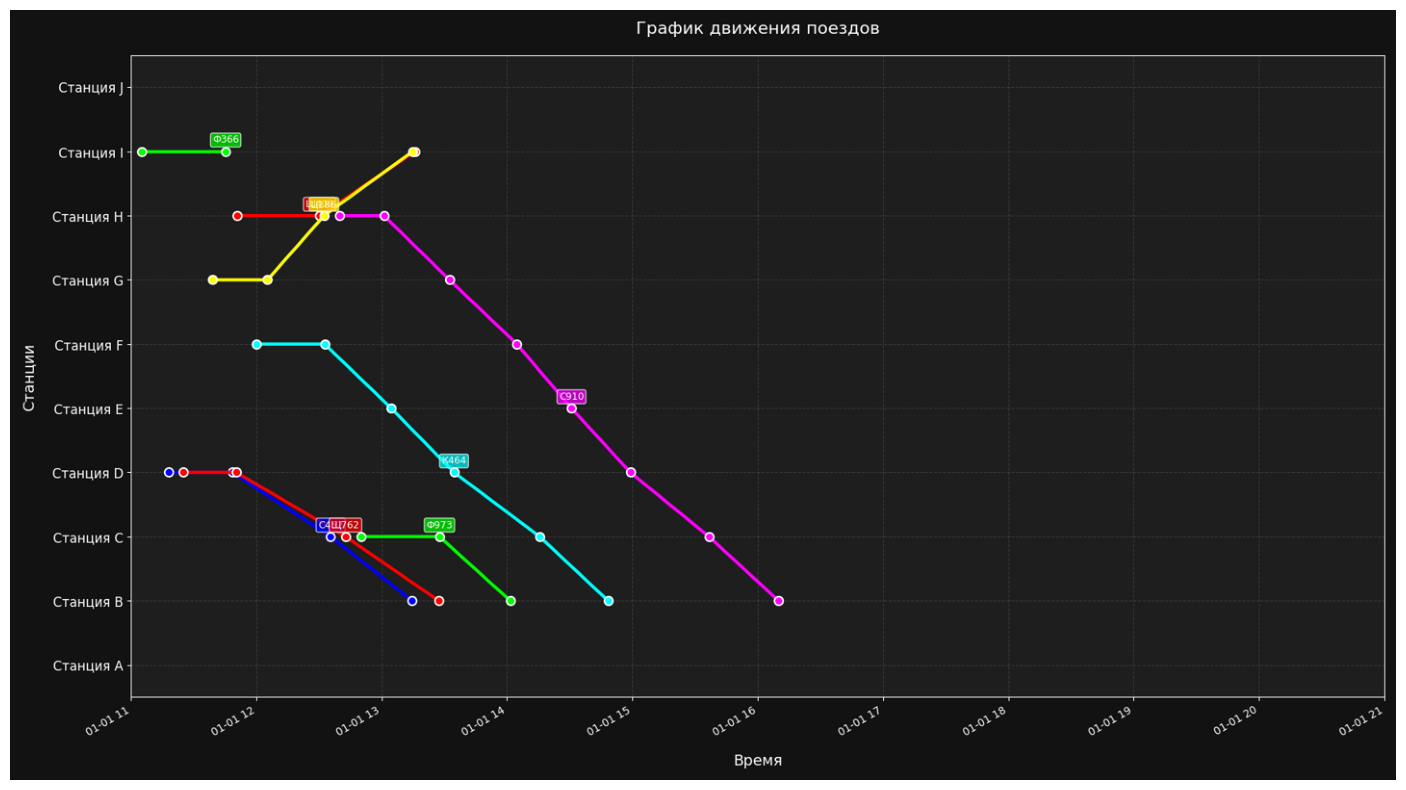

**Текущая ситуация:**

1. Поезд №366 (зеленая линия) движется от станции J к станции I.
2. Поезд №88 (желтая линия) движется от станции I к станции H.
3. Поезд №10 (красная линия) движется от станции H к станции G.
4. Поезд №973 (зеленая линия) движется от станции G к станции D.
5. Поезд №973 (зеленая линия) движется от станции D к станции C.
6. Поезд №973 (зеленая линия) движется от станции C к станции B.
7. Поезд №973 (зеленая линия) движется от станции B к станции A.

**Необходимые действия:**

1. **Проверка пересечения поездов:** 
   - Поезд №366 и поезд №88 пересекаются на станции I.
   - Поезд №10 и поезд №973 пересекаются на станции H.
   - Поезд №973 и поезд №973 пересекаются на станции D.

2. **Предупреждение:** 
   - Поезд №366 и поезд №88 пересекаются на станции I.
   - Поезд №10 и поезд №973 пересекаются на станции H.
   - Поезд №973 и поезд №973 пересекаются на станции D.

**Приоритет:** 
   - Критично: Пересечение поездов на станции I, станции H и станции D.

In [5]:
from PIL import Image
import base64
from io import BytesIO
import torch
from IPython.display import Markdown, display
import matplotlib.pyplot as plt


img = Image.open('/kaggle/input/dispetcher-qwen-dataset/graphics/graphics/graphic_1.png')
plt.figure(figsize=(18, 10))
plt.imshow(img.resize((int(0.8*img.size[0]), int(0.8*img.size[1]))))
plt.axis('off')
plt.show()

messages = [
        {'role': 'system',
    'content': [
        {'type': 'text',
        'text': system_prompt}
    ]},
    {
        "role": "user",
        "content": [
            {
                'type': 'image',
                'image': img.resize((int(0.8*img.size[0]), int(0.8*img.size[1])))
            },
            
        ],
    }
]

text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

with torch.no_grad():
    generated_ids = model.generate(**inputs, max_new_tokens=1024)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

display(Markdown(output_text[0]))


In [6]:
system_prompt2 = '''system: Ты ассистент диспетчера. Тебе надо не говорить общие вещи, а давать чёткие указания что делать диспетчеру по ситуации. Очень важная часть - восстановление графика движения пассажирских поездов.
Тебе не надо писать ситуацию, напиши только алгоритм действий. Ты должен советовать ему что делать, чётко следуя этой инструкции:
1. Действия при возникновении аварийной ситуации
Пункт 17 Приложения N 19 к Инструкции:|
Машинист поезда или главный кондуктор , если он сопровождает поезд, обязаны немедленно сообщить о ЧС диспетчеру поездному или дежурному по ближайшей железнодорожной станции для принятия мер.
Сообщение должно включать обстоятельства аварии, наличие и расположение в составе поезда вагонов с ВМ (взрывчатые материалы) и вагонов с опасными грузами, а также передачу номеров аварийных карточек или содержание аварийных карточек.
В случае аварии, схода железнодорожного подвижного состава или пожара диспетчер поездной при необходимости должен дать указание энергодиспетчеру о снятии напряжения с контактной сети.
Машинист или главный кондуктор обязаны, исходя из обстановки, осуществлять возможные меры по ликвидации аварийной ситуации и её последствий, руководствуясь командами диспетчера поездного, требованиями должностной инструкции, аварийных карточек и указаниями специалистов, сопровождающих вагоны с ВМ и опасными грузами.
2. Действия дежурного по железнодорожной станции при ЧС
Пункт 18 Приложения N 19 к Инструкции:
Дежурный по железнодорожной станции, получив сообщение машиниста поезда об аварии, должен полностью передать его содержание диспетчеру поездному и действовать в соответствии с его указаниями.
3. Действия при возникновении пожара или создания пожароопасной ситуации
Пункт 20 Приложения N 19 к Инструкции:
В случае возникновения пожара или создания пожароопасной ситуации на объектах железнодорожной инфраструктуры или на подвижном составе, находящемся в радиусе до 100 м от вагонов с ВМ, работники железнодорожного транспорта должны принять меры по удалению вагонов с ВМ на безопасное расстояние, но не менее чем на 100 м от зоны пожара.
4. Ликвидация последствий аварийных ситуаций
Пункт 21 Приложения N 19 к Инструкции:
Диспетчер поездной обязан сообщить уполномоченному представителю владельца инфраструктуры о всех происшествиях с поездами и вагонами с ВМ и незамедлительно принять меры к быстрейшей ликвидации последствий аварийных ситуаций.
5. Обеспечение безопасности при авариях
Пункт 22 Приложения N 19 к Инструкции:
Действия по обеспечению безопасности и ликвидации последствий аварийных ситуаций с ВМ должны проводиться исходя из создавшейся обстановки согласно правилам безопасности и порядку ликвидации аварийных ситуаций с опасными грузами при их перевозке по железным дорогам и Правилами перевозок опасных грузов.
6. Дополнительные меры при ЧС
Пункт 17 Приложения N 12 к Инструкции:
В случае аварийной ситуации с ВМ в пределах железнодорожной станции дежурный по станции обязан сообщить о случившемся диспетчеру поездному и начальнику железнодорожной станции, установить возможность и условия дальнейшего пропуска поездов, производства маневровой работы, и при необходимости принять меры к прекращению движения поездов и маневров.

Надо написать только алгоритм действий диспетчера
Пример: user: человек выбежал на пути
model: Оценка текущей ситуации:
После подтверждения безопасности от машиниста и служб безопасности, оценить состояние пути и инфраструктуры на участке.
Убедиться, что препятствие (человек или иные объекты) полностью устранено.
Координация с соседними станциями:
Связаться с дежурными по ближайшим станциям для координации возобновления движения.
Уточнить, есть ли задержки у других поездов, ожидающих разрешения на движение.
Приоритеты в движении поездов:
Дать приоритет пассажирским поездам, особенно скоростным и международным, чтобы минимизировать их задержки.
Перенаправить грузовые поезда на резервные маршруты, если это необходимо для освобождения основных путей для пассажирских составов.
Пересчет интервалов движения:
Использовать диспетчерскую систему для пересчета временных интервалов между поездами.
Корректировать расписание, чтобы избежать скопления поездов на станциях или перегруженности путей.
Информирование заинтересованных сторон:
Сообщить начальнику станции и перевозчикам о возможных задержках.
Для пассажирских поездов организовать информирование пассажиров через вокзальные табло и объявления о причинах задержки.
Контроль исполнения корректировок:
Непрерывно мониторить ситуацию на участке и вносить корректировки в график, если возникают новые задержки.
Обеспечить четкую коммуникацию с машинистами для своевременного получения информации об их местоположении и состоянии.
Анализ последствий:
По завершении инцидента провести анализ влияния ЧС на график движения.
Определить необходимость дополнительных мер для предотвращения подобных ситуаций в будущем.
Документация изменений:
Задокументировать все принятые решения по корректировке графика, включая причины задержек, время их устранения и действия, предпринятые для нормализации движения.
'''

In [8]:
from PIL import Image
import base64
from io import BytesIO
import torch
from IPython.display import Markdown, display

messages = [
        {'role': 'system',
    'content': [
        {'type': 'text',
        'text': system_prompt2}
    ]},
    {
        "role": "user",
        "content": [
            {
                'type': 'text',
                'text': 'Человек выбежал на пути'
            },
            
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
inputs = processor(
    text=[text],
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
with torch.no_grad():
    generated_ids = model.generate(**inputs, max_new_tokens=1024)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

display(Markdown(output_text[0]))

1. Оценка текущей ситуации:
   - Проверить безопасность от машиниста и служб безопасности.
   - Оценить состояние пути и инфраструктуры на участке.
   - Убедиться, что препятствие (человек или иные объекты) полностью устранено.

2. Кoordination с соседними станциями:
   - Связаться с дежурными по ближайшим станциям для координации возобновления движения.
   - Уточнить, есть ли задержки у других поездов, ожидающих разрешения на движение.

3. Приоритеты в движении поездов:
   - Дать приоритет пассажирским поездам, особенно скоростным и международным, чтобы минимизировать их задержки.
   - Перенаправить грузовые поезда на резервные маршруты, если это необходимо для освобождения основных путей для пассажирских составов.

4. Пересчет интервалов движения:
   - Использовать диспетчерскую систему для пересчета временных интервалов между поездами.

5. Корректировать расписание, чтобы избежать скопления поездов на станциях или перегруженности путей.
   - Определить необходимость дополнительных мер для предотвращения подобных ситуаций в будущем.

6. Информирование заинтересованных сторон:
   - Сообщить начальнику станции и перевозчикам о возможных задержках.
   - Для пассажирских поездов организовать информирование пассажиров через вокзальные табло и объявления о причинах задержки.

7. Контроль исполнения корректировок:
   - Непрерывно мониторить ситуацию на участке и вносить корректировки в график, если возникают новые задержки.
   - Обеспечить четкую коммуникацию с машинистами для своевременного получения информации об их местоположении и состоянии.

8. Анализ последствий:
   - По завершении инцидента провести анализ влияния ЧС на график движения.
   - Определить необходимость дополнительных мер для предотвращения подобных ситуаций в будущем.

9. Документация изменений:
   - Задокументировать все принятые решения по корректировке графика, включая причины задержек, время их устранения и действия, предпринятые для нормализации движения.